In [48]:
import pandas as pd
from collections import Counter
import re
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
#q1
data = pd.read_csv('Queries.csv')

In [50]:
null_values = data.isnull().sum()
null_values

Top queries    0
Clicks         0
Impressions    0
CTR            0
Position       0
dtype: int64

In [51]:
column_info = data.info()
column_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Top queries  1000 non-null   object 
 1   Clicks       1000 non-null   int64  
 2   Impressions  1000 non-null   int64  
 3   CTR          1000 non-null   object 
 4   Position     1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [52]:
descriptive_stats = data.describe()
descriptive_stats

,Clicks,Impressions,Position
count,1000.0000,1000.000000,1000.000000
mean,172.2750,1939.466000,3.985930
std,281.0221,4856.702605,2.841842
min,48.0000,62.000000,1.000000
25%,64.0000,311.000000,2.010000
50%,94.0000,590.500000,3.120000
75%,169.0000,1582.750000,5.342500
max,5223.0000,73380.000000,28.520000


In [53]:
#q2
data['CTR'] = data['CTR'].str.replace('%', '').astype(float) / 100

data['CTR'].head()

0    0.3583
1    0.8128
2    0.0283
3    0.4057
4    0.7638
Name: CTR, dtype: float64

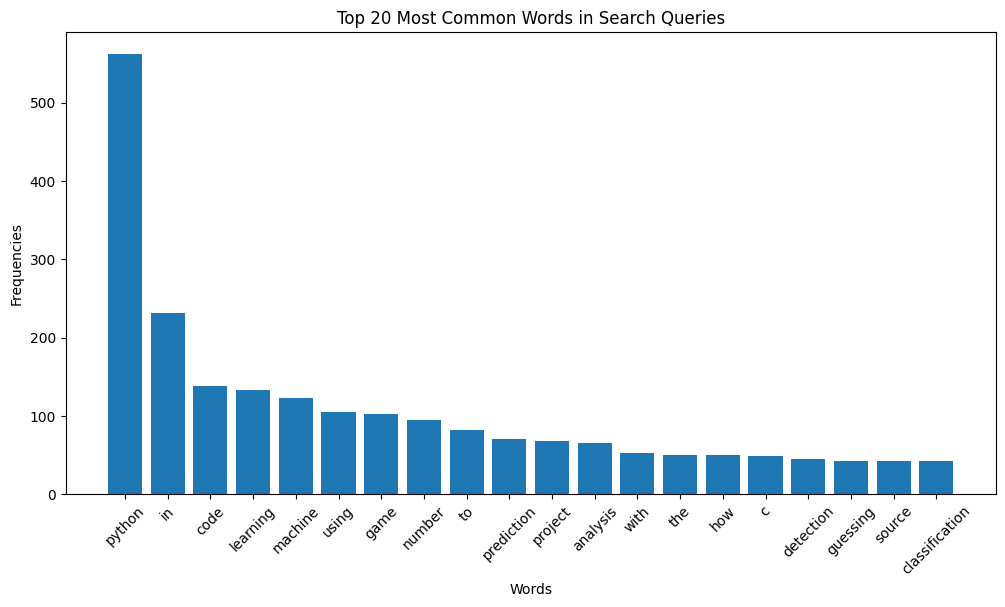

In [54]:
#q3
# function to clean and split queries
def clean_and_split(query):
    query = query.lower()  
    query = re.sub(r'[^a-z0-9\s]', '', query)  # remove punctuation and special characters
    words = query.split()  # split into words
    return words

# counting frequency of each word
word_counter = Counter()
for query in data['Top queries']:
    words = clean_and_split(query)
    word_counter.update(words)

# get most common words
common_words = word_counter.most_common(20)

# plotting
words, frequencies = zip(*common_words)
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Top 20 Most Common Words in Search Queries')
plt.xticks(rotation=45)
plt.show()

                                 Top queries  Clicks
0                number guessing game python    5223
1                        thecleverprogrammer    2809
2           python projects with source code    2077
3  classification report in machine learning    2012
4                      the clever programmer    1931
5        standard scaler in machine learning    1559
6                               aman kharwal    1490
7                python turtle graphics code    1455
8      python game projects with source code    1421
9        82 python projects with source code    1343


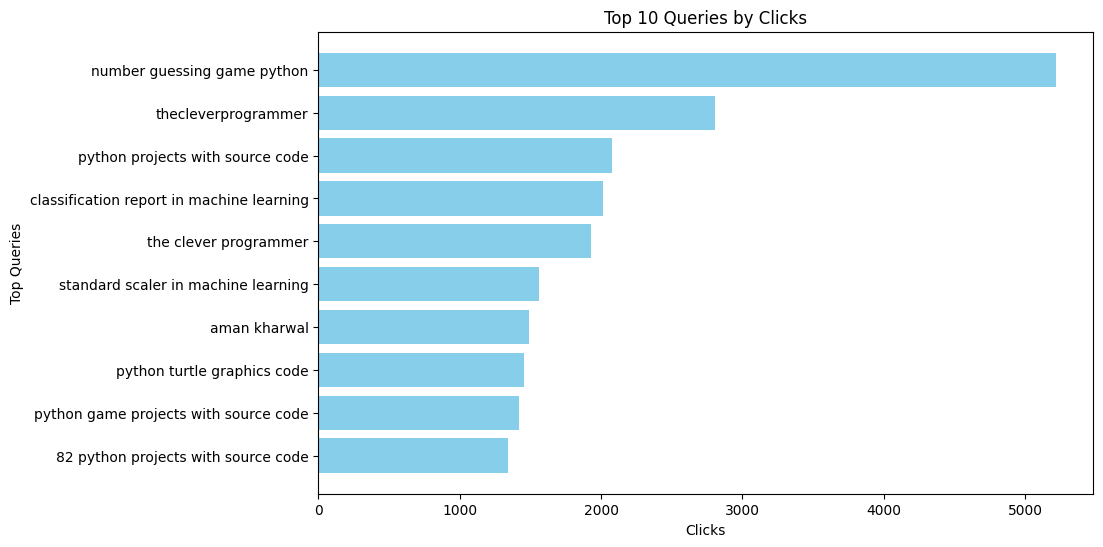

                          Top queries  Impressions
2    python projects with source code        73380
82                           r2 score        56322
34           machine learning roadmap        42715
21              classification report        39896
232                    standardscaler        39267
91     facebook programming languages        36055
15         rock paper scissors python        35824
36                  pandas datareader        26663
180             classification_report        24917
54                  pandas_datareader        24689


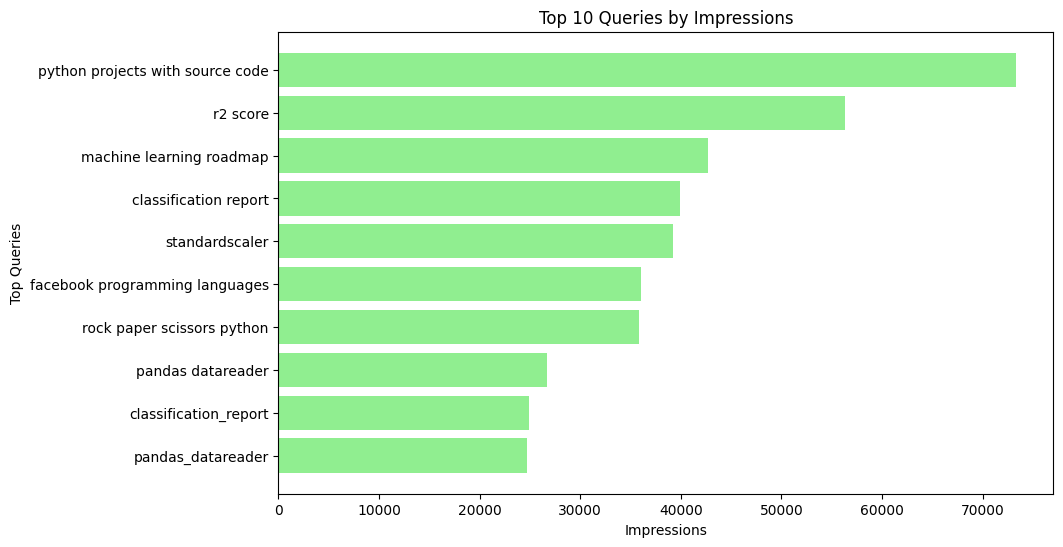

In [55]:
#q4

# Top 10 queries by clicks
top_queries_by_clicks = data.sort_values(by='Clicks', ascending=False).head(10)[['Top queries', 'Clicks']]

# Top 10 queries by impressions
top_queries_by_impressions = data.sort_values(by='Impressions', ascending=False).head(10)[['Top queries', 'Impressions']]

# Plot Top 10 queries by clicks
print(top_queries_by_clicks)
plt.figure(figsize=(10, 6))
plt.barh(top_queries_by_clicks['Top queries'], top_queries_by_clicks['Clicks'], color='skyblue')
plt.xlabel('Clicks')
plt.ylabel('Top Queries')
plt.title('Top 10 Queries by Clicks')
plt.gca().invert_yaxis()
plt.show()

# Plot Top 10 queries by impressions
print(top_queries_by_impressions)
plt.figure(figsize=(10, 6))
plt.barh(top_queries_by_impressions['Top queries'], top_queries_by_impressions['Impressions'], color='lightgreen')
plt.xlabel('Impressions')
plt.ylabel('Top Queries')
plt.title('Top 10 Queries by Impressions')
plt.gca().invert_yaxis()
plt.show()


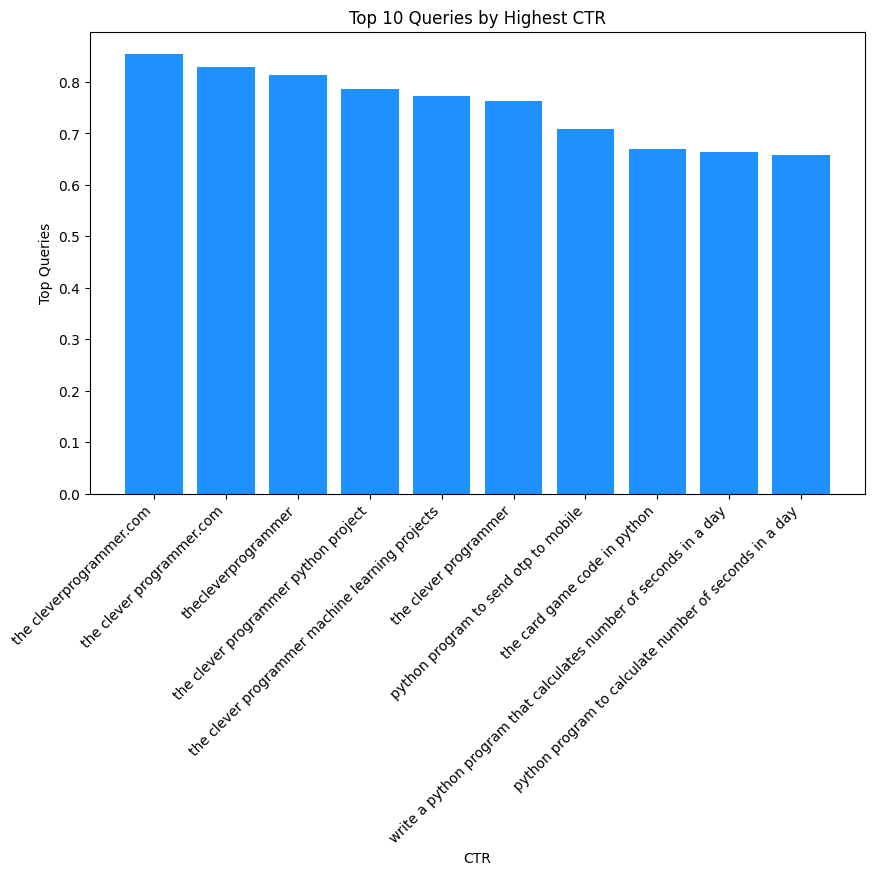

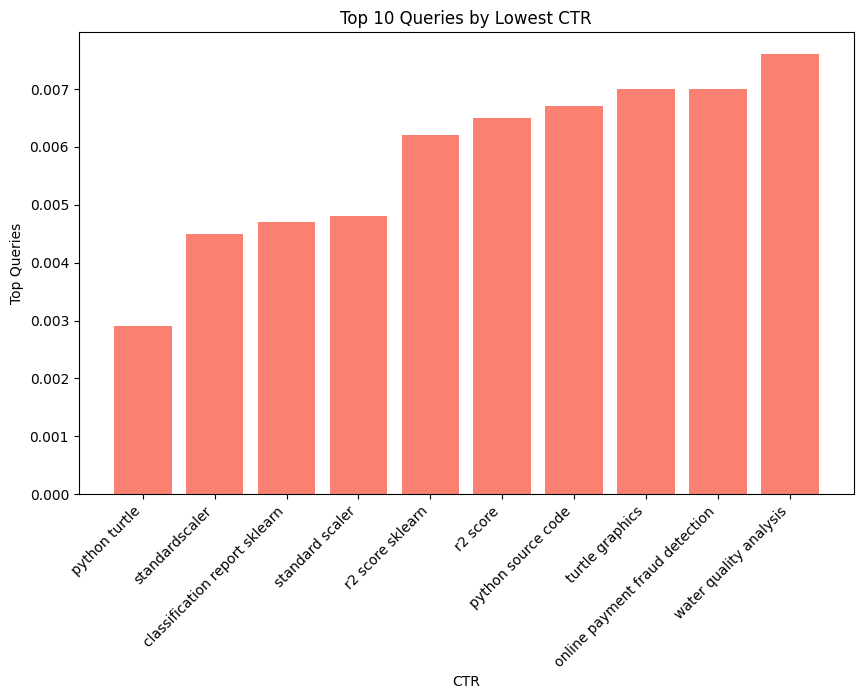

In [60]:
#q5

# Top 10 queries with the highest CTR
top_queries_by_CTR = data.sort_values(by='CTR', ascending=False).head(10)[['Top queries', 'CTR']]

# Top 10 queries with the lowest CTR
lowest_queries_by_CTR = data.sort_values(by='CTR', ascending=True).head(10)[['Top queries', 'CTR']]

# Plot Top 10 Queries by highest CTR
plt.figure(figsize=(10, 6))
plt.bar(top_queries_by_CTR['Top queries'], top_queries_by_CTR['CTR'], color='dodgerblue')
plt.xlabel('CTR')
plt.ylabel('Top Queries')
plt.title('Top 10 Queries by Highest CTR')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot Top 10 Queries by lowest CTR
plt.figure(figsize=(10, 6))
plt.bar(lowest_queries_by_CTR['Top queries'], lowest_queries_by_CTR['CTR'], color='salmon')
plt.xlabel('CTR')
plt.ylabel('Top Queries')
plt.title('Top 10 Queries by Lowest CTR')
plt.xticks(rotation=45, ha='right')
plt.show()


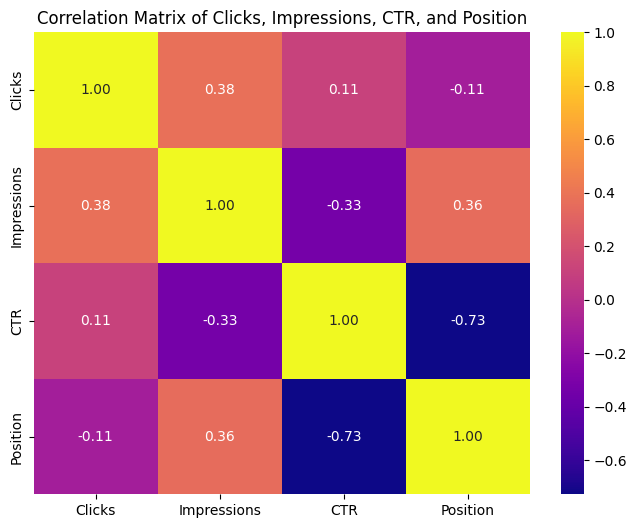

In [62]:
#q6
# Calculate the correlation matrix
correlation_matrix = data[['Clicks', 'Impressions', 'CTR', 'Position']].corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt='.2f')
plt.title('Correlation Matrix of Clicks, Impressions, CTR, and Position')
plt.show()

Anomalies detected:
                                      Top queries  Clicks  Impressions  \
0                     number guessing game python    5223        14578   
1                             thecleverprogrammer    2809         3456   
2                python projects with source code    2077        73380   
3       classification report in machine learning    2012         4959   
4                           the clever programmer    1931         2528   
5             standard scaler in machine learning    1559         7292   
6                                    aman kharwal    1490         5752   
7                     python turtle graphics code    1455        13585   
8           python game projects with source code    1421         4946   
9             82 python projects with source code    1343         3562   
10                        guess the number python    1287         4569   
11                              clever programmer    1243        21566   
12    car price pr

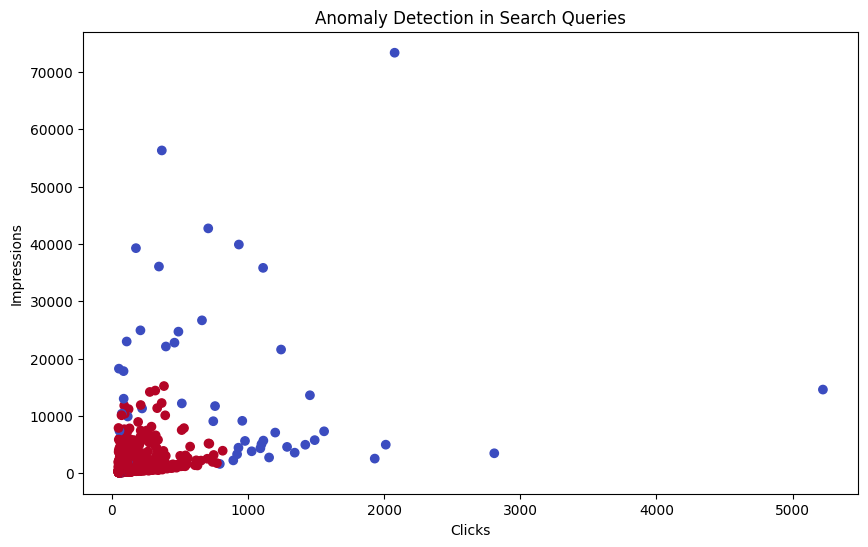

In [61]:
#q7
from sklearn.ensemble import IsolationForest


# Select relevant features for anomaly detection
features = data[['Clicks', 'Impressions', 'CTR', 'Position']]

# Apply the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
data['Anomaly'] = iso_forest.fit_predict(features)

# Anomalies: -1 indicates an anomaly, 1 indicates normal data
anomalies = data[data['Anomaly'] == -1]


print("Anomalies detected:")
print(anomalies[['Top queries', 'Clicks', 'Impressions', 'CTR', 'Position']])

plt.figure(figsize=(10, 6))
plt.scatter(data['Clicks'], data['Impressions'], c=data['Anomaly'], cmap='coolwarm', marker='o')
plt.xlabel('Clicks')
plt.ylabel('Impressions')
plt.title('Anomaly Detection in Search Queries')
plt.show()
